In [3]:
import pandas as pd
import numpy as np

import os

os.chdir('../')
print(os.getcwd())

/Users/gbemidebe/Documents/GitHub/SolutionTransformer


### load data

In [4]:
raw_data = pd.read_csv('data/raw/Brouwer_2021.csv')
print(raw_data.shape)
raw_data.head()

(20870, 4)


,Solute_SMILES,Solvent_SMILES,log-gamma,T
0,C,CCCCCCCCCCCCCCCC,-0.261365,40.0
1,C,CCCCCCCCCCCCCCCC,-0.287682,70.0
2,C,CCCCCCCCCCCCCCCC,-0.301105,90.0
3,CC,CCCCCCCCCCCCCCCC,-0.235722,40.0
4,CC,CCCCCCCCCCCCCCCC,-0.248461,70.0


### check data

In [5]:
raw_data.isna().sum()

Solute_SMILES     0
Solvent_SMILES    0
log-gamma         0
T                 0
dtype: int64

### canonicalize data

In [6]:
from rdkit import Chem
def canonicalize(smiles):
    if Chem.MolFromSmiles(smiles) is not None:
        return Chem.MolToSmiles(Chem.MolFromSmiles(smiles))


In [8]:
raw_data['Solute_SMILES_canon'] = raw_data['Solute_SMILES'].apply(canonicalize)
raw_data['Solvent_SMILES_canon'] = raw_data['Solvent_SMILES'].apply(canonicalize)

### analyze data

In [10]:
from rdkit import Chem
from rdkit.Chem import Descriptors

In [11]:
# Add molecular weight column
raw_data['Solute_SMILES_canon_MW'] = raw_data['Solute_SMILES_canon'].apply(lambda x: Descriptors.MolWt((Chem.MolFromSmiles(x))))

In [12]:
# Add molecular weight column
raw_data['Solvent_SMILES_canon_MW'] = raw_data['Solvent_SMILES_canon'].apply(lambda x: Descriptors.MolWt((Chem.MolFromSmiles(x))))

<AxesSubplot:>

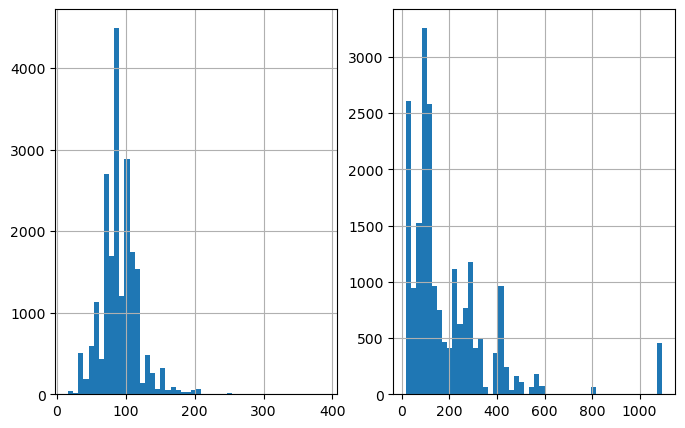

In [13]:
# plot bar
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
raw_data['Solute_SMILES_canon_MW'].hist(bins=50)

plt.subplot(1, 2, 2)
raw_data['Solvent_SMILES_canon_MW'].hist(bins=50)


In [15]:
raw_data.head()

,Solute_SMILES,Solvent_SMILES,log-gamma,T,Solute_SMILES_canon,Solvent_SMILES_canon,Solute_SMILES_canon_MW,Solvent_SMILES_canon_MW
0,C,CCCCCCCCCCCCCCCC,-0.261365,40.0,C,CCCCCCCCCCCCCCCC,16.043,226.448
1,C,CCCCCCCCCCCCCCCC,-0.287682,70.0,C,CCCCCCCCCCCCCCCC,16.043,226.448
2,C,CCCCCCCCCCCCCCCC,-0.301105,90.0,C,CCCCCCCCCCCCCCCC,16.043,226.448
3,CC,CCCCCCCCCCCCCCCC,-0.235722,40.0,CC,CCCCCCCCCCCCCCCC,30.070,226.448
4,CC,CCCCCCCCCCCCCCCC,-0.248461,70.0,CC,CCCCCCCCCCCCCCCC,30.070,226.448


In [16]:
# Add logP column
raw_data['Solute_SMILES_canon_logP'] = raw_data['Solute_SMILES_canon'].apply(lambda x: Descriptors.MolLogP((Chem.MolFromSmiles(x))))
raw_data['Solvent_SMILES_canon_logP'] = raw_data['Solvent_SMILES_canon'].apply(lambda x: Descriptors.MolLogP((Chem.MolFromSmiles(x))))

<AxesSubplot:>

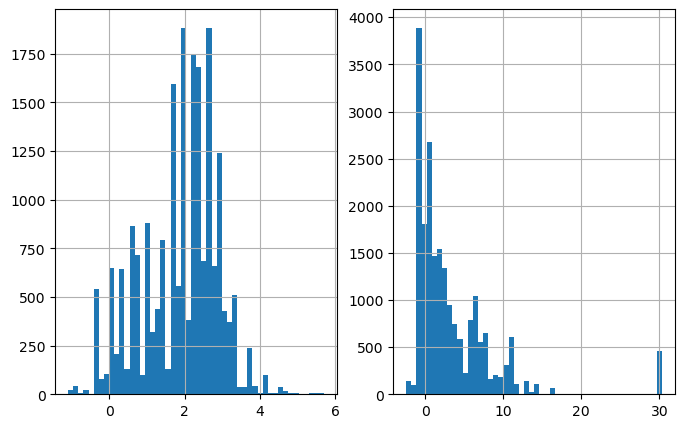

In [17]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
raw_data['Solute_SMILES_canon_logP'].hist(bins=50)

plt.subplot(1, 2, 2)
raw_data['Solvent_SMILES_canon_logP'].hist(bins=50)

### Save data

In [18]:
raw_data.columns

Index(['Solute_SMILES', 'Solvent_SMILES', 'log-gamma', 'T',
       'Solute_SMILES_canon', 'Solvent_SMILES_canon', 'Solute_SMILES_canon_MW',
       'Solvent_SMILES_canon_MW', 'Solute_SMILES_canon_logP',
       'Solvent_SMILES_canon_logP'],
      dtype='object')

In [19]:
new_data = raw_data[['Solute_SMILES_canon', 'Solvent_SMILES_canon', 'T', 'log-gamma']]

In [20]:
new_data.columns = ['solute', 'solvent', 'T', 'log_gamma']
new_data.head()

,solute,solvent,T,log_gamma
0,C,CCCCCCCCCCCCCCCC,40.0,-0.261365
1,C,CCCCCCCCCCCCCCCC,70.0,-0.287682
2,C,CCCCCCCCCCCCCCCC,90.0,-0.301105
3,CC,CCCCCCCCCCCCCCCC,40.0,-0.235722
4,CC,CCCCCCCCCCCCCCCC,70.0,-0.248461


In [21]:
new_data.to_csv('data/processed/cleaned_Brouwer_2021.csv', index=False)